# SEEPS4ALL noteboook 1
## Verification of deterministic forecasts with SEEPS
(requires to run notebook_get_forecast_single.ipynb first if you want to assess your own set of forecasts)

Assessing precipitation forecasts against observations using a local climatology for SEEPS computation. 

In [1]:
import datetime
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
from utils.utils_data  import get_obs
from utils.utils_data  import get_fct
from utils.utils_data  import select_obs

from utils.utils_data  import get_domain
from utils.utils_stats  import get_weights

from utils.utils_scores import get_score
from utils.utils_scores import get_seeps_comps

from utils.utils_plots  import plot_simple_scores
from utils.utils_plots  import plot_seeps_comp

### 1. Settings

In [5]:
# where the data sit or will sit
path_data     = "/my/data/folder/seeps4all/"

# forecasts
name_forecasts = ["ifs_20240601_to_20240831_00",
                  "aifsv1_20240601_to_20240831_00"]

# colours and names 
colors = ["tab:red","tab:blue"]
labels = ["IFS", "AIFS single v1"]

# ouput path and prefix
prefig = "./prefix"


### 2. Read observations (+ metadata + seeps coefs) and forecasts

In [6]:
# open data
obs_data = get_obs(path_data,"seeps")
fct_data = get_fct(path_data,name_forecasts)

# select obs data according to fct data
obs_data = select_obs (obs_data,fct_data,"seeps")

open: /ec/res4/scratch/mozb/rodeo/seeps4all//obs_seeps_tp24_2022_2024_ecad.zarr
... total number of observation locations: 10705
open: /ec/res4/scratch/mozb/rodeo/seeps4all//ifs_20240601_to_20240831_00.zarr
Number of forecast steps: 10
Number of forecast runs: 92
open: /ec/res4/scratch/mozb/rodeo/seeps4all//aifsv1_20240601_to_20240831_00.zarr
Number of forecast steps: 10
Number of forecast runs: 92


### 3. Domain and station weighting 

In [7]:
# verification domain
domain = "europe" # default otherwise define
obs_data,fct_data = get_domain(obs_data,fct_data,domain)

focus on domain europe


In [8]:
# weighting: "uniform" or "station_weighting"
weights = get_weights(obs_data,"station_weighting")

weights based on station density


### 4. Compute and plot SEEPS

Compute SEEPS for each experiments

In [9]:
seeps = get_score(obs_data,fct_data,weights,"seeps")

experiment 0, 10 steps
step: 0 1 2 3 4 5 6 7 8 9 
experiment 1, 10 steps
step: 0 1 2 3 4 5 6 7 8 9 


Generate plots

In [10]:
plot_info= dict()
plot_info["prefig"] = prefig
plot_info["colors"] = colors
plot_info["labels"] = labels

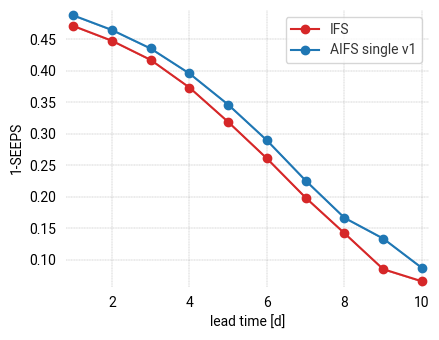

In [11]:
plot_simple_scores(1-seeps,"1-SEEPS",plot_info,bootstrap=False)

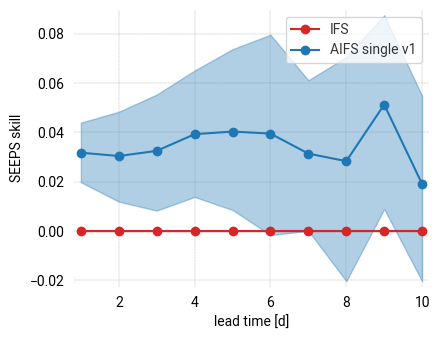

In [12]:
plot_simple_scores(seeps,"SEEPS skill",plot_info) 

### 5. Decompose SEEPS and plot components

SEEPS decomposition following Fig. 10 in North et al 2013 ( https://doi.org/10.1002/met.1405 )

In [13]:
seeps_all =  get_seeps_comps(obs_data,fct_data,weights)

experiment 0, 10 steps
step: 0 1 2 3 4 5 6 7 8 9 
experiment 1, 10 steps
step: 0 1 2 3 4 5 6 7 8 9 


SEEPS decomposition plot

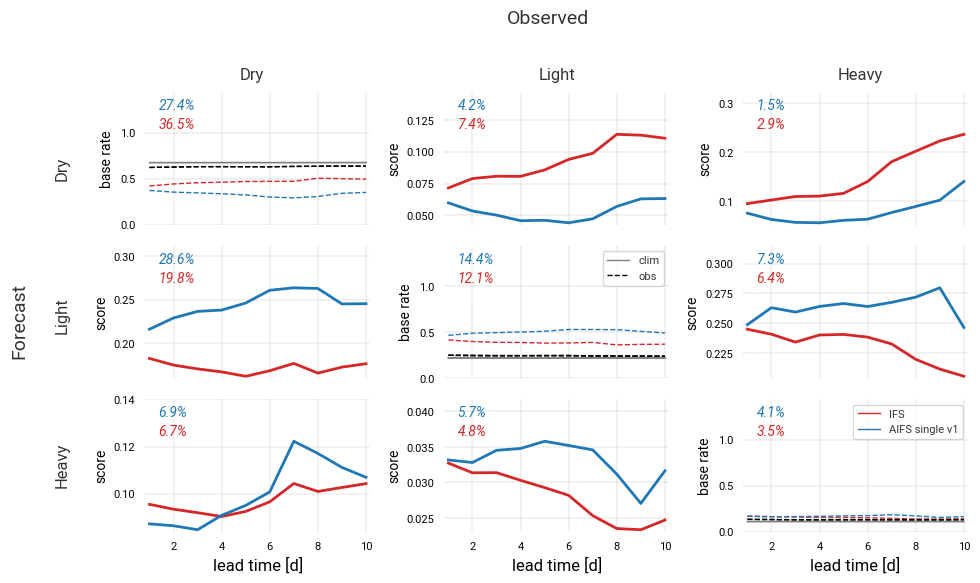

In [14]:
plot_seeps_comp(seeps_all,plot_info)

End of the Notebook